In [1]:
import gzip
import math
import numpy
import random
import sklearn
import string
from collections import defaultdict
from nltk.stem.porter import *
from sklearn import linear_model
from gensim.models import Word2Vec
import dateutil
from scipy.sparse import lil_matrix

# Text Processing: RAW_recipes.CSV #

In [2]:
import csv
import gzip

dataset_recipes = []

with gzip.open("/Users/seonminhwang/Downloads/archive/RAW_recipes.csv.gz", mode='rt', newline='') as f:
    reader = csv.DictReader(f)  # Assuming the file has headers
    for row in reader:
        dataset_recipes.append(row)
        if len(dataset_recipes) >= 20000:
            break

In [3]:
len(dataset_recipes)

20000

In [4]:
dataset_recipes[0]

{'name': 'arriba   baked winter squash mexican style',
 'id': '137739',
 'minutes': '55',
 'contributor_id': '47892',
 'submitted': '2005-09-16',
 'tags': "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
 'nutrition': '[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]',
 'n_steps': '11',
 'steps': "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce th

In [6]:
# Import NLP functions

import nltk

stop_words = set(nltk.corpus.stopwords.words('english'))
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
stemmer = PorterStemmer()

# Define Text-Preprocessing functions

def preprocess_text(text):
    text = ''.join([c.lower() if not c in punctuation else ' ' for c in text])
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

for row in dataset_recipes:
    row['processed_description'] = preprocess_text(row['description'])
    row['processed_steps'] = preprocess_text(row['steps'])

In [7]:
dataset_recipes[0]

{'name': 'arriba   baked winter squash mexican style',
 'id': '137739',
 'minutes': '55',
 'contributor_id': '47892',
 'submitted': '2005-09-16',
 'tags': "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
 'nutrition': '[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]',
 'n_steps': '11',
 'steps': "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce th

# Text Processing: RAW_Interaction.CSV #

In [8]:
import csv
import gzip

dataset_inter = []

with gzip.open("/Users/seonminhwang/Downloads/archive/RAW_interactions.csv.gz", mode='rt', newline='') as f:
    reader = csv.DictReader(f)  # Assuming the file has headers
    for row in reader:
        dataset_inter.append(row)
        if len(dataset_inter) >= 20000:
            break

In [11]:
len(dataset_inter)

20000

In [12]:
dataset_inter[19999]

{'user_id': '242106',
 'recipe_id': '92066',
 'date': '2008-02-08',
 'rating': '5',
 'review': "I made this up before Christmas, put it in cellophane bags and gave it to work colleagues as a gift. Then I made up jars of it for family for Christmas as well. Universally everyone asked me for the recipe because they liked it so much. \r\n\r\nI finally got around to making some up for us about three weeks ago. (because everyone was raving about it at work) It's been tried on BBQ'd steak and on oven baked chicken wings thuis far at our house. I love it! It is spicy but not hot and adds a wonderful flavour. You can sprinkle it on meats immediately prior to cooking or leave it to marinade for hours before cooking. Im also thinking you could sprinkle chops and other meats with this and then dump then in the freezer until youre ready to cook them.\r\n\r\nI wish they allowed more than 5 stars because this recipe is a definite keeper and we will make it up again and again."}

# Create Vector for Word Count #

In [13]:
import nltk

# Import NLP functions
stop_words = set(nltk.corpus.stopwords.words('english'))
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
stemmer = PorterStemmer()

# Create vocabulary dictionary of all words in the Corpus
vocabulary = {}  # Will map words to indices
index = 0

for d in dataset_inter:
    r = ''.join([c for c in d['review'].lower() if not c in punctuation])
    for w in r.split():
        #w = stemmer.stem(w)                             # Stemming
        if w not in stop_words and w not in vocabulary:  # If word is not a stopword and not in vocabulary
            vocabulary[w] = index
            index += 1

In [14]:
len(vocabulary)

24240

In [15]:
# Create word count vector using the dictionary
def create_count_vector(datum):
    feat = numpy.zeros(len(vocabulary))
    r = ''.join([c for c in datum['review'].lower() if not c in punctuation])
    for w in r.split():
        #w = stemmer.stem(w)                         # Stemming
        if w not in stop_words and w in vocabulary:  # If it's not a stopword and it's in the vocabulary
            feat[vocabulary[w]] += 1 
    return feat

count_vectors = [create_count_vector(d) for d in dataset_inter]

for i, d in enumerate(dataset_inter):                # Append back to the original dataset 
    d['wordcount_vector'] = count_vectors[i]

In [16]:
dataset_inter[19999]

{'user_id': '242106',
 'recipe_id': '92066',
 'date': '2008-02-08',
 'rating': '5',
 'review': "I made this up before Christmas, put it in cellophane bags and gave it to work colleagues as a gift. Then I made up jars of it for family for Christmas as well. Universally everyone asked me for the recipe because they liked it so much. \r\n\r\nI finally got around to making some up for us about three weeks ago. (because everyone was raving about it at work) It's been tried on BBQ'd steak and on oven baked chicken wings thuis far at our house. I love it! It is spicy but not hot and adds a wonderful flavour. You can sprinkle it on meats immediately prior to cooking or leave it to marinade for hours before cooking. Im also thinking you could sprinkle chops and other meats with this and then dump then in the freezer until youre ready to cook them.\r\n\r\nI wish they allowed more than 5 stars because this recipe is a definite keeper and we will make it up again and again.",
 'wordcount_vector': 

## Potential Sentiment Analysis (Unigram-BoW) ##

In [17]:
X = [d['wordcount_vector']for d in dataset_inter]
y = [d['rating'] for d in dataset_inter]

Split = int(0.5*len(dataset_inter))

Xtrain = X[:Split]
ytrain = y[:Split]
Xtest = X[Split:]
ytest = y[Split:]

mod = sklearn.linear_model.LogisticRegression(C=1).fit(Xtrain, ytrain)
theta = mod.coef_
predictions = mod.predict(Xtest)

correct = (predictions == ytest)
accuracy = sum(correct) / len(correct)
accuracy

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7144

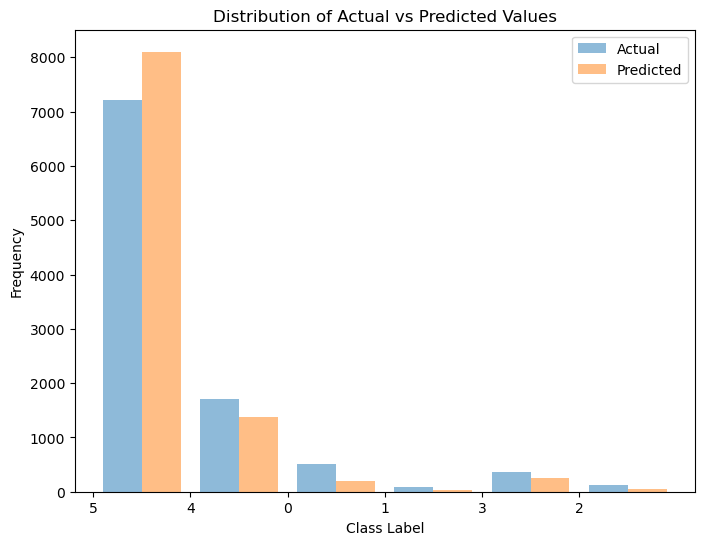

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist([ytest, predictions], bins=numpy.arange(0, 7, 1), alpha=0.5, label=['Actual', 'Predicted'])

plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend(loc='upper right')
plt.show()

## Using TF-IDF Vector ##

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Prepare the review texts for TF-IDF (no Stemming)
reviews = [''.join([c for c in d['review'].lower() if c not in string.punctuation]) for d in dataset_inter]

# Create the TF-IDF vectors
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')  # Limit to top 1000 features
tfidf_vectors = tfidf.fit_transform(reviews)

# Assign TF-IDF vectors back to each dataset_inter entry
for i, d in enumerate(dataset_inter):
    d['tfidf_vector'] = tfidf_vectors[i].toarray().flatten()

In [21]:
dataset_inter[19999]

{'user_id': '242106',
 'recipe_id': '92066',
 'date': '2008-02-08',
 'rating': '5',
 'review': "I made this up before Christmas, put it in cellophane bags and gave it to work colleagues as a gift. Then I made up jars of it for family for Christmas as well. Universally everyone asked me for the recipe because they liked it so much. \r\n\r\nI finally got around to making some up for us about three weeks ago. (because everyone was raving about it at work) It's been tried on BBQ'd steak and on oven baked chicken wings thuis far at our house. I love it! It is spicy but not hot and adds a wonderful flavour. You can sprinkle it on meats immediately prior to cooking or leave it to marinade for hours before cooking. Im also thinking you could sprinkle chops and other meats with this and then dump then in the freezer until youre ready to cook them.\r\n\r\nI wish they allowed more than 5 stars because this recipe is a definite keeper and we will make it up again and again.",
 'wordcount_vector': 

In [22]:
X = [d['tfidf_vector']for d in dataset_inter]
y = [d['rating'] for d in dataset_inter]

Split = int(0.5*len(dataset_inter))

Xtrain = X[:Split]
ytrain = y[:Split]
Xtest = X[Split:]
ytest = y[Split:]

mod = sklearn.linear_model.LogisticRegression(C=1).fit(Xtrain, ytrain)
theta = mod.coef_
predictions = mod.predict(Xtest)

correct = (predictions == ytest)
accuracy = sum(correct) / len(correct)
accuracy

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7357

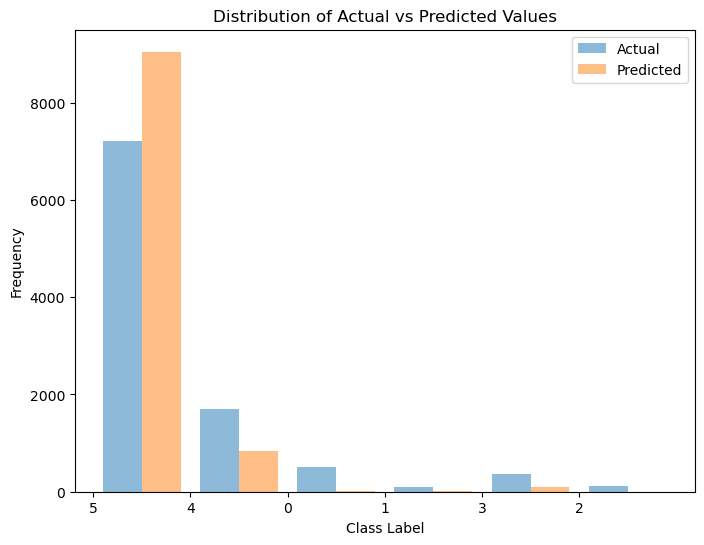

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist([ytest, predictions], bins=numpy.arange(0, 7, 1), alpha=0.5, label=['Actual', 'Predicted'])

plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend(loc='upper right')
plt.show()